# SHAP

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from config.config import Config
from src.evaluation import SHAPExplainer
from src.train import ModelTrainer

In [2]:
cfg = Config(Path("../config/config.yaml"))

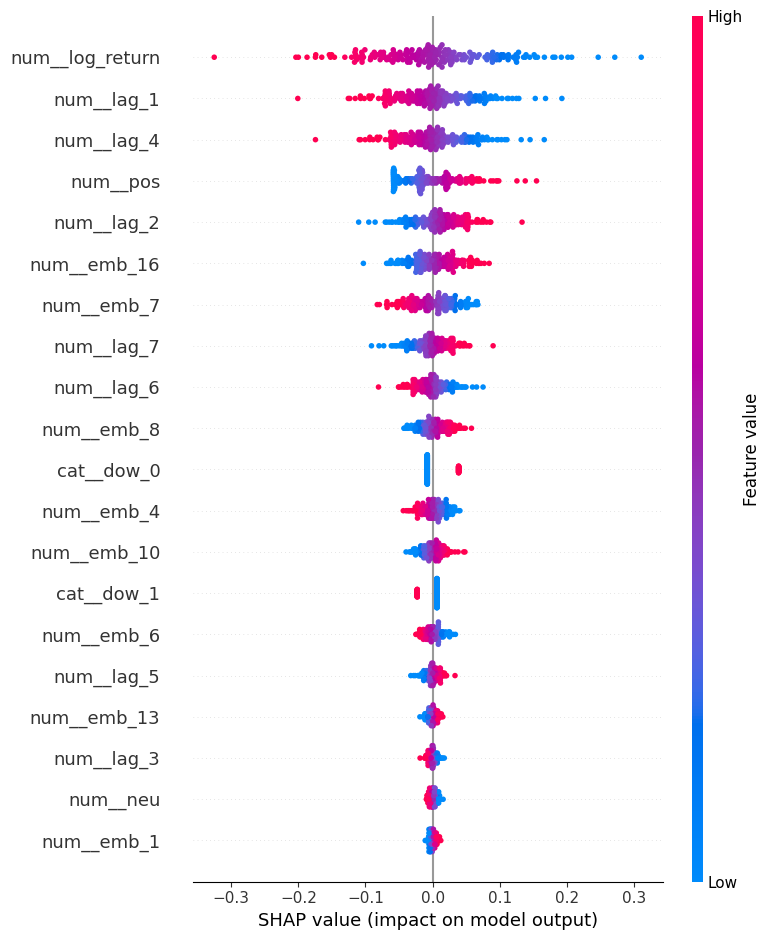

In [3]:
model_path = Path(cfg.data.models_dir) / "linreg.pkl"
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test_linreg.parquet")
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

explainer = SHAPExplainer(
    model=model,
    preprocessor=preprocessor,
    background_data=X_test.sample(n=100, random_state=cfg.runtime.seed),
    mode="linear",
)

shap_values = explainer.explain(X_test)

shap.summary_plot(
    shap_values[0],
    X_test_proc,
    feature_names=feature_names,
    show=True
)